In [26]:
from gensim.models.fasttext import load_facebook_model
from gensim.models.fasttext import load_facebook_vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import sklearn.ensemble
import sklearn

In [5]:
# load FastText model
fasttext_model = load_facebook_vectors('../../Downloads/CHEME DIRECT/NLP Project/cc.en.300.bin')

In [37]:
class FastTextVectorizer:
    def __init__(self, fasttext_model):
        self.fasttext_model = fasttext_model

    def transform(self, X):
        return np.array([
            np.mean([self.fasttext_model[w] for w in words.split() if w in self.fasttext_model]
                    or [np.zeros(self.fasttext_model.vector_size)], axis=0)
            for words in X
        ])

In [9]:
# load dataset
df1 = pd.read_excel('../../Downloads/CHEME DIRECT/NLP Project/PSE Dataset.xlsx', sheet_name='SamePerson Report')
df2 = pd.read_excel('../../Downloads/CHEME DIRECT/NLP Project/PSE Dataset.xlsx', sheet_name='Multiple People Report')
df3 = pd.read_excel('../../Downloads/CHEME DIRECT/NLP Project/PSE Dataset.xlsx', sheet_name='Multiple People Less Details')

In [12]:
train_1, test_1 = sklearn.model_selection.train_test_split(df1, test_size=0.2, random_state=206)
train_2, test_2 = sklearn.model_selection.train_test_split(df2, test_size=0.2, random_state=206)
train_3, test_3 = sklearn.model_selection.train_test_split(df3, test_size=0.2, random_state=206)

In [13]:
train_1_text = train_1['Report'].values.reshape(-1,1)
test_1_text = test_1['Report'].values.reshape(-1,1)

train_1_label = train_1['Level'].values.reshape(-1,1)
test_1_label = test_1['Level'].values.reshape(-1,1)

train_2_text = train_2['Report'].values.reshape(-1,1)
test_2_text = test_2['Report'].values.reshape(-1,1)

train_2_label = train_2['Level'].values.reshape(-1,1)
test_2_label = test_2['Level'].values.reshape(-1,1)

train_3_text = train_3['Report'].values.reshape(-1,1)
test_3_text = test_3['Report'].values.reshape(-1,1)

train_3_label = train_3['Level'].values.reshape(-1,1)
test_3_label = test_3['Level'].values.reshape(-1,1)

In [14]:
train_1_text_list = train_1_text.tolist()
train_1_text_str = [item for sublist in train_1_text_list for item in sublist]

test_1_text_list = test_1_text.tolist()
test_1_text_str = [item for sublist in test_1_text_list for item in sublist]

train_1_label_list = train_1_label.tolist()
train_1_label_str = [item for sublist in train_1_label_list for item in sublist]

test_1_label_list = test_1_label.tolist()
test_1_label_str = [item for sublist in test_1_label_list for item in sublist]

In [15]:
train_2_text_list = train_2_text.tolist()
train_2_text_str = [item for sublist in train_2_text_list for item in sublist]

test_2_text_list = test_2_text.tolist()
test_2_text_str = [item for sublist in test_2_text_list for item in sublist]

train_2_label_list = train_2_label.tolist()
train_2_label_str = [item for sublist in train_2_label_list for item in sublist]

test_2_label_list = test_2_label.tolist()
test_2_label_str = [item for sublist in test_2_label_list for item in sublist]

In [16]:
train_3_text_list = train_3_text.tolist()
train_3_text_str = [item for sublist in train_3_text_list for item in sublist]

test_3_text_list = test_3_text.tolist()
test_3_text_str = [item for sublist in test_3_text_list for item in sublist]

train_3_label_list = train_3_label.tolist()
train_3_label_str = [item for sublist in train_3_label_list for item in sublist]

test_3_label_list = test_3_label.tolist()
test_3_label_str = [item for sublist in test_3_label_list for item in sublist]

In [17]:
train_text = train_1_text_str + train_2_text_str + train_3_text_str
test_text = test_1_text_str + test_2_text_str + test_3_text_str

train_label = train_1_label_str + train_2_label_str + train_3_label_str
test_label = test_1_label_str + test_2_label_str + test_3_label_str

In [38]:
# Transform raw text data to vectors
vectorizer = FastTextVectorizer(fasttext_model)
train_text_ft = vectorizer.transform(train_text)
test_text_ft = vectorizer.transform(test_text)

In [40]:
# Train the classifier
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_text_ft, train_label)

RandomForestClassifier(random_state=42)

In [41]:
# accuracy report
print("model accuracy:", clf.score(test_text_ft, test_label))

predict_label = clf.predict(test_text_ft)

print(sklearn.metrics.classification_report(test_label, predict_label, digits=4))

model accuracy: 0.6
              precision    recall  f1-score   support

           1     0.8182    1.0000    0.9000         9
           2     0.2727    0.5000    0.3529         6
           3     0.4615    0.4286    0.4444        14
           4     0.5714    0.5333    0.5517        15
           5     0.9091    0.6250    0.7407        16

    accuracy                         0.6000        60
   macro avg     0.6066    0.6174    0.5980        60
weighted avg     0.6430    0.6000    0.6095        60



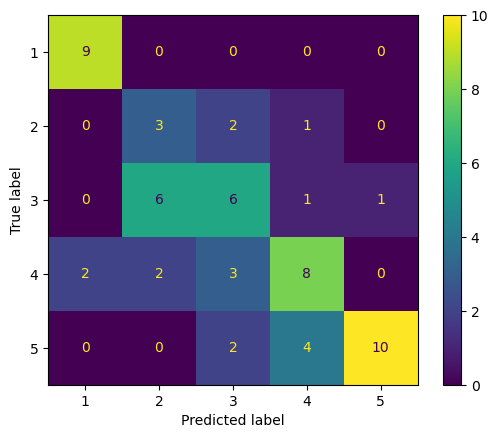

In [42]:
# plot a confusion matrix
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(clf, test_text_ft, test_label)